In [2]:
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
covid_data = os.path.abspath(os.path.join('/Users/afilisetti/Documents/git-projects/COVID-19/'))
if covid_data not in sys.path:
    sys.path.append(covid_data)
    
# DATA --> https://github.com/pcm-dpc/COVID-19

# Province Data

In [3]:
cities_data_json_uri = "/Users/afilisetti/Documents/git-projects/COVID-19/dati-json/dpc-covid19-ita-province.json"

In [4]:
cities_data_json = pd.read_json(cities_data_json_uri)
cities_data_json["data"] = pd.to_datetime(cities_data_json["data"]).dt.strftime('%Y-%m-%d')

In [5]:
cities_data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   data                     3328 non-null   object 
 1   stato                    3328 non-null   object 
 2   codice_regione           3328 non-null   int64  
 3   denominazione_regione    3328 non-null   object 
 4   codice_provincia         3328 non-null   int64  
 5   denominazione_provincia  3328 non-null   object 
 6   sigla_provincia          3328 non-null   object 
 7   lat                      3328 non-null   float64
 8   long                     3328 non-null   float64
 9   totale_casi              3328 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 260.1+ KB


In [6]:
cities_data_json.head(5)

data stato  codice_regione denominazione_regione  codice_provincia  \
0  2020-02-24   ITA              13               Abruzzo                69   
1  2020-02-24   ITA              13               Abruzzo                66   
2  2020-02-24   ITA              13               Abruzzo                68   
3  2020-02-24   ITA              13               Abruzzo                67   
4  2020-02-24   ITA              13               Abruzzo               979   

                denominazione_provincia sigla_provincia        lat       long  \
0                                Chieti              CH  42.351032  14.167546   
1                              L'Aquila              AQ  42.351222  13.398438   
2                               Pescara              PE  42.464584  14.213648   
3                                Teramo              TE  42.658918  13.704400   
4  In fase di definizione/aggiornamento                   0.000000   0.000000   

   totale_casi  
0            0  
1            0  
2            0  
3            0  
4            0

# Regions Data

In [20]:
regions_data_json_uri = "/Users/afilisetti/Documents/git-projects/COVID-19/dati-json/dpc-covid19-ita-regioni.json"
regions_data_json = pd.read_json(regions_data_json_uri)
regions_data_json["data"] = pd.to_datetime(regions_data_json["data"]).dt.strftime('%Y-%m-%d')
regions_data_json["ratio_positivi"] = regions_data_json["nuovi_attualmente_positivi"] / regions_data_json["tamponi"] 

In [21]:
regions_data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   data                         546 non-null    object 
 1   stato                        546 non-null    object 
 2   codice_regione               546 non-null    int64  
 3   denominazione_regione        546 non-null    object 
 4   lat                          546 non-null    float64
 5   long                         546 non-null    float64
 6   ricoverati_con_sintomi       546 non-null    int64  
 7   terapia_intensiva            546 non-null    int64  
 8   totale_ospedalizzati         546 non-null    int64  
 9   isolamento_domiciliare       546 non-null    int64  
 10  totale_attualmente_positivi  546 non-null    int64  
 11  nuovi_attualmente_positivi   546 non-null    int64  
 12  dimessi_guariti              546 non-null    int64  
 13  deceduti            

In [22]:
list(set(regions_data_json['denominazione_regione']))

['Molise',
 "Valle d'Aosta",
 'Liguria',
 'Lazio',
 'Basilicata',
 'P.A. Bolzano',
 'Marche',
 'Emilia Romagna',
 'Puglia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Umbria',
 'Calabria',
 'Toscana',
 'Sicilia',
 'Abruzzo',
 'Piemonte',
 'Sardegna',
 'Campania',
 'P.A. Trento',
 'Lombardia']

In [23]:
regions_data_json.head(5)

data stato  codice_regione denominazione_regione        lat  \
0  2020-02-24   ITA              13               Abruzzo  42.351222   
1  2020-02-24   ITA              17            Basilicata  40.639471   
2  2020-02-24   ITA               4          P.A. Bolzano  46.499335   
3  2020-02-24   ITA              18              Calabria  38.905976   
4  2020-02-24   ITA              15              Campania  40.839566   

        long  ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
0  13.398438                       0                  0                     0   
1  15.805148                       0                  0                     0   
2  11.356624                       0                  0                     0   
3  16.594402                       0                  0                     0   
4  14.250850                       0                  0                     0   

   isolamento_domiciliare  totale_attualmente_positivi  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   nuovi_attualmente_positivi  dimessi_guariti  deceduti  totale_casi  \
0                           0                0         0            0   
1                           0                0         0            0   
2                           0                0         0            0   
3                           0                0         0            0   
4                           0                0         0            0   

   tamponi  ratio_positivi  
0        5             0.0  
1        0             NaN  
2        1             0.0  
3        1             0.0  
4       10             0.0

# Supporting Functions

In [24]:
def get_cities_from_regions(region):
    return list(set(cities_data_json.loc[(cities_data_json['denominazione_regione']==region) &
                                    (cities_data_json['denominazione_provincia']!='In fase di definizione/aggiornamento')]['denominazione_provincia']))

In [25]:
def plot_regions(data, data_filter, y='totale_casi'):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    ax = sns.lineplot(x="data",
                      y=y,
                      hue="denominazione_regione",
                      data=data.query(f"denominazione_regione in {data_filter}"),
                      linestyle='dotted',
                      marker="o"
                     )
    plt.subplot(1,2,2)
    bx = sns.lineplot(x="data",
                      y=y,
                      hue="denominazione_regione",
                      markers=True,
                      dashes=True,
                      data=data.query(f"denominazione_regione in {data_filter}"),
                      linestyle='dotted',
                      marker="o"
                     )
    bx.set_yscale("log")
    bx.set_ylabel(f"log({y})")
    plt.draw()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
    bx.set_xticklabels(bx.get_xticklabels(), rotation=90);  

In [26]:
def plot_region(region, data_json):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    ax = sns.lineplot(x="data",
                      y="totale_casi",
                      hue="sigla_provincia",
                      linestyle='dotted',
                      marker="o",
                      data=data_json.query(f"denominazione_regione == '{region}'"), 
                     )
    plt.subplot(1,2,2)
    ax.set_ylabel("Totale Cases")
    bx = sns.lineplot(x="data",
                      y="totale_casi",
                      hue="sigla_provincia",
                      linestyle='dotted',
                      marker="o",
                      data=data_json.query(f"denominazione_regione == '{region}'"),
                     )
    bx.set_yscale('log')
    bx.set_ylabel("log(Total Cases)")
    plt.draw()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
    bx.set_xticklabels(bx.get_xticklabels(), rotation=90); 

In [27]:
def plot_region_indicators(regions_area):
    plot_regions(cities_data_json, regions_area, 'totale_casi')
    plot_regions(regions_data_json, regions_area, 'totale_casi')
    plot_regions(regions_data_json, regions_area, 'deceduti')
    plot_regions(regions_data_json, regions_area, 'terapia_intensiva')
    plot_regions(regions_data_json, regions_area, 'tamponi')
    plot_regions(regions_data_json, regions_area, 'ratio_positivi')

In [28]:
def growth_rate(city, avg_growth_rate_window=AVG_GROWTH_RATE_WINDOW):
    data_city = data_json.loc[data_json['sigla_provincia']==city]
    growth_rate = list()
    for idx, i in enumerate(data_city['totale_casi']):
        if idx > 0:
            if list(data_city['totale_casi'])[idx-1] > 0:
                growth_rate.append(i /list(data_city['totale_casi'])[idx-1])

    avg_gr = list()
    for idx, g in enumerate(growth_rate[0:len(growth_rate)-avg_growth_rate_window]):
        avg_gr.append(np.mean(growth_rate[idx:idx+avg_growth_rate_window]))
        
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    ax = plt.plot(growth_rate[2:], linestyle='dotted', marker="o")
    plt.xlabel("Days from 26/2");
    plt.ylabel("Growth rate (%)");
    plt.title(f"Daily Growth Rate ({city})");
    plt.subplot(1,2,2)
    plt.plot(avg_gr, linestyle='dotted', marker="o")
    plt.xlabel(f"Average growth rate (Floating window: {avg_growth_rate_window} days)");
    plt.ylabel("AVG Growth rate (%)");
    plt.title(f"AVG Daily Growth Rate ({city})");
    

In [29]:
def growth_rates(data,
                 areas,
                 area_target='sigla_provincia',
                 indicator='totale_casi',
                 avg_growth_rate_window=AVG_GROWTH_RATE_WINDOW):
    growth_rates = dict()
    for area in areas:
        data_area = data.loc[data[area_target]==area]
        growth_rate = list()
        growth_rates[area] = dict()
        for idx, i in enumerate(data_area[indicator]):
            if idx > 0:
                if list(data_area[indicator])[idx-1] > 1:
                    temp_gr = i /list(data_area[indicator])[idx-1]
                    growth_rate.append((temp_gr,list(data_area['data'])[idx]))
        
        growth_rates[area]['growth_rate'] = growth_rate
        growth_rate_n, growth_rate_date = zip(*growth_rates[area]['growth_rate'])
        
        avg_gr = list()
        for idx, g in enumerate(growth_rate_n[0:len(growth_rate_n)-avg_growth_rate_window+1]):
            avg_gr.append(np.mean(growth_rate_n[idx:idx+avg_growth_rate_window]))
        
            
        growth_rates[area]['avg_growth_rate'] = avg_gr
        
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    for area in areas:
        growth_rate_n, growth_rate_date = zip(*growth_rates[area]['growth_rate'])
        ax = plt.plot(
            growth_rate_date[:],
            growth_rate_n[:],
            linestyle='solid',
            marker="o"
        )
        plt.xlabel("Date (data starts from case 0)");
        plt.ylabel("Growth Rate");
        plt.title(f"Daily Growth Rate ({area})");
    plt.legend(areas)
    plt.xticks(rotation=90);
    plt.subplot(1,2,2)
    for area in areas:
        plt.plot(growth_rates[area]['avg_growth_rate'][:], linestyle='solid', marker="o")
        plt.xlabel(f"Average growth Factor (Floating window: {avg_growth_rate_window} days) from case 0");
        plt.ylabel("AVG Growth Factor");
        plt.title(f"AVG Daily Growth Factor ({area})");
    plt.legend(areas)
    plt.draw()

# Params

In [30]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

In [31]:
AVG_GROWTH_RATE_WINDOW = 7

NW_REGIONS = ["Lombardia", "Piemonte", "Valle d'Aosta", "Liguria"]
NE_REGIONS = ["Emilia Romagna", "Veneto", "Friuli Venezia Giulia", "P.A. Bolzano", "P.A. Trento"]
C_REGIONS = ["Lazio", "Toscana", "Umbria", "Marche"]
S_REGIONS = ["Campania", "Abruzzo", "Molise", "Campania", "Puglia", "Basilicata"]
ISLANDS = ["Sicilia", "Sardegna"]

CITIES_LOMBARDIA = get_cities_from_regions("Lombardia")
CITIES_EMILIA = get_cities_from_regions("Emilia")
CITIES_VENETO = get_cities_from_regions("Veneto")
CITIES_CAMPANIA = get_cities_from_regions("Campania")

today = date.today() - timedelta(days=1)#).strftime('%Y-%m-%d')
print(f"Date of the analysis: {today.strftime('%Y-%m-%d')}")

Date of the analysis: 2020-03-20


# Map

In [32]:
# set the filepath and load in a shapefile
fp = "/Users/afilisetti/Documents/git-projects/COVID-19/aree/shp/dpc-covid19-ita-aree.shp"
map_df = gpd.read_file(fp)
today_data_json = cities_data_json.loc[(cities_data_json['data']==today.strftime('%Y-%m-%d')) & (cities_data_json['sigla_provincia'] != "")]

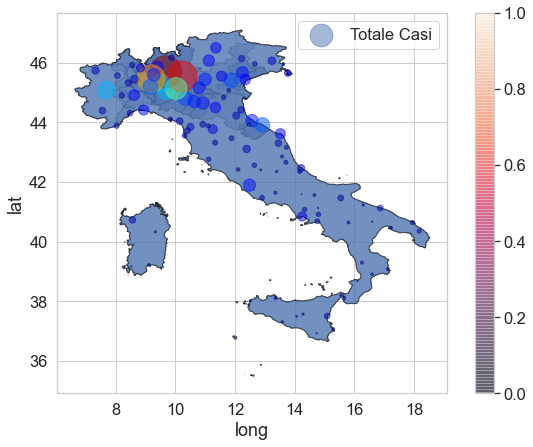

In [33]:
ax = map_df.plot(figsize=(10, 10), alpha=0.4, edgecolor='k');
today_data_json.plot(kind="scatter",
                        x="long",
                        y="lat",
                        alpha=0.5,
                        s=today_data_json["totale_casi"]/5,
                        label="Totale Casi", figsize=(10,7),
                        c=today_data_json["totale_casi"],
                        cmap=plt.get_cmap("jet"), 
                        colorbar=True,
                        ax=ax);

# Region Areas

## North-West Regions

### Trend

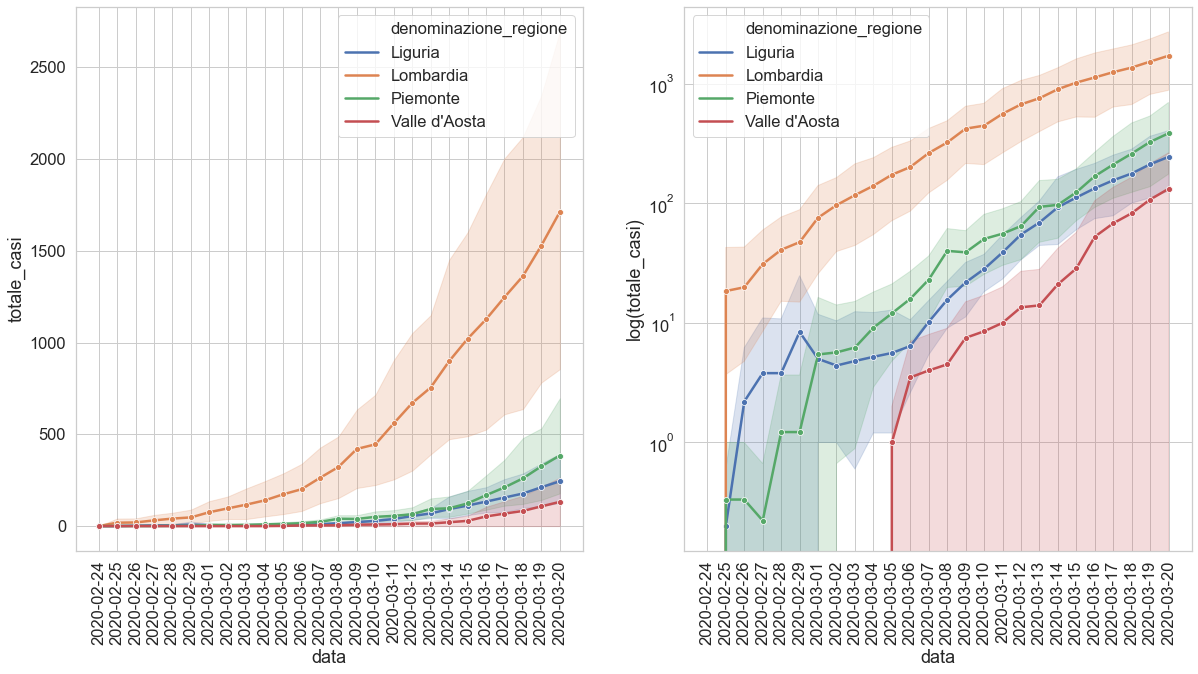

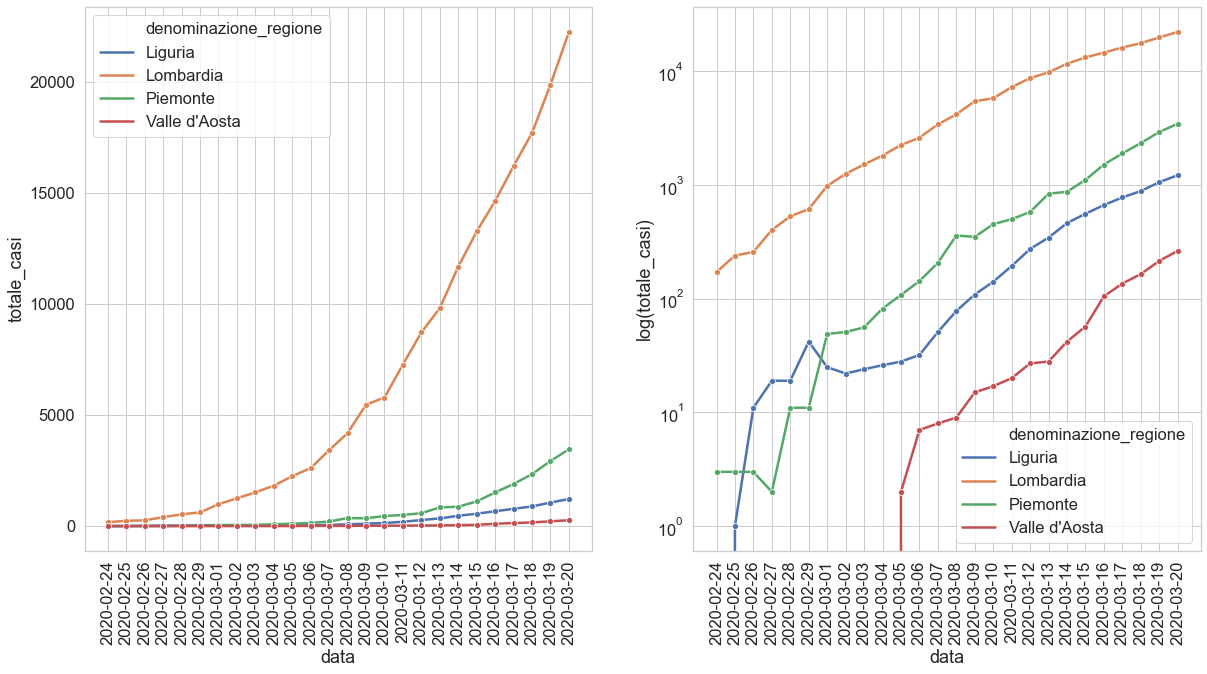

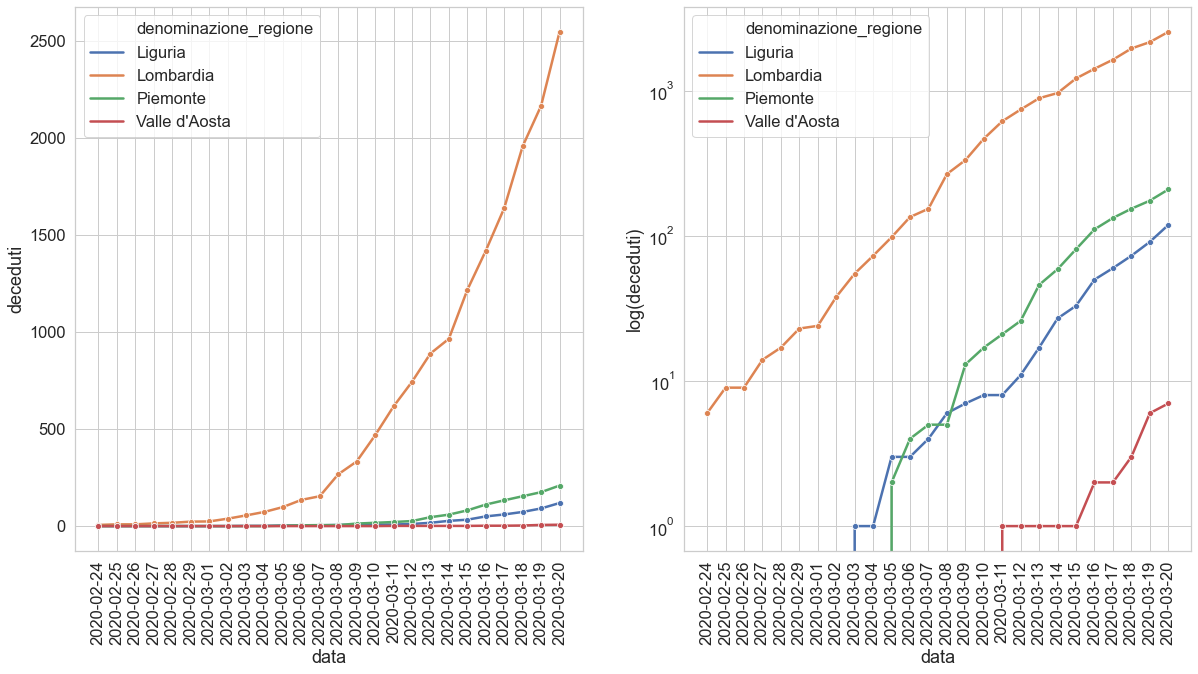

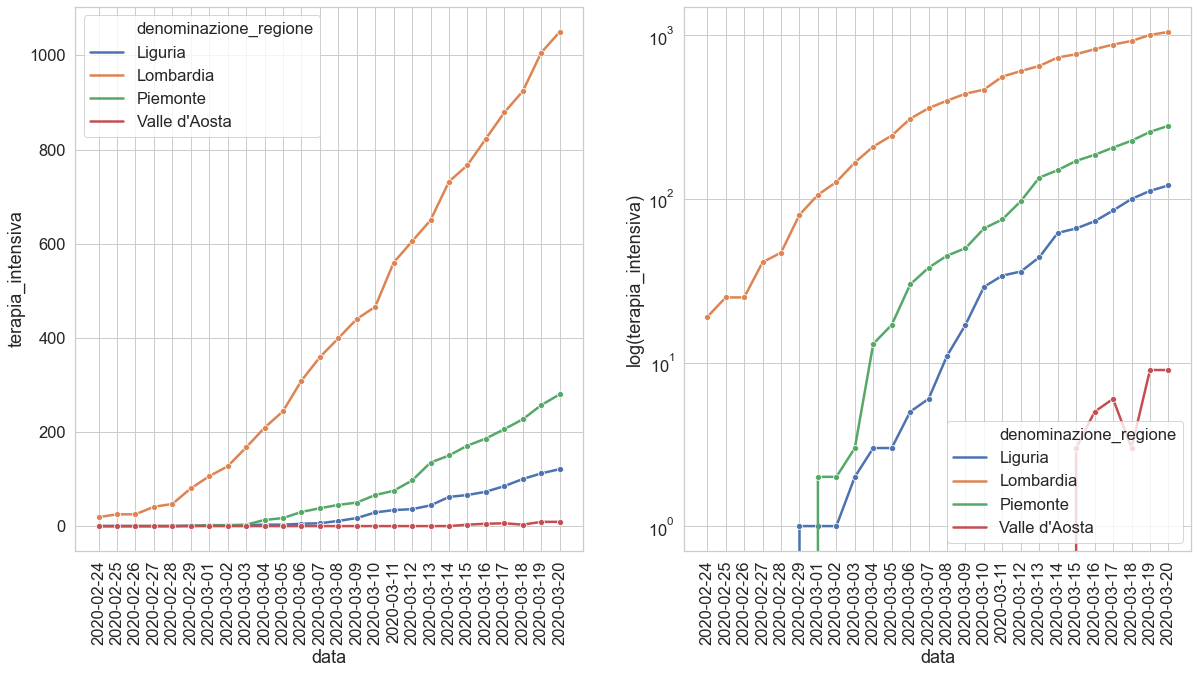

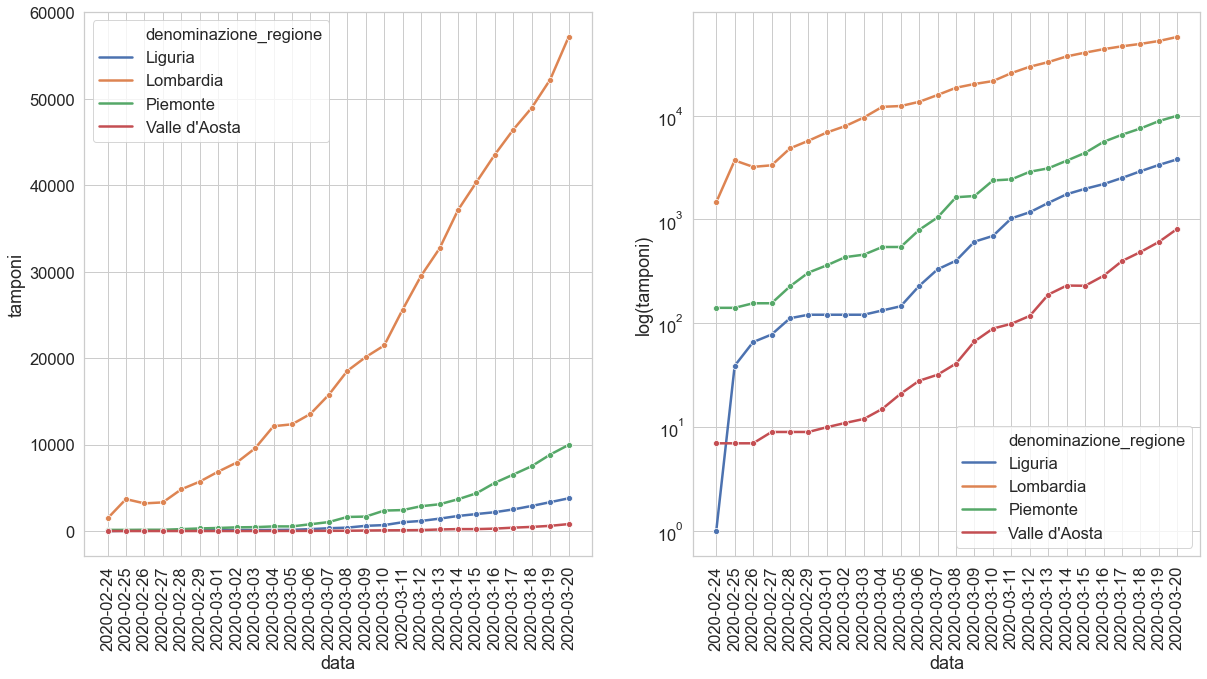

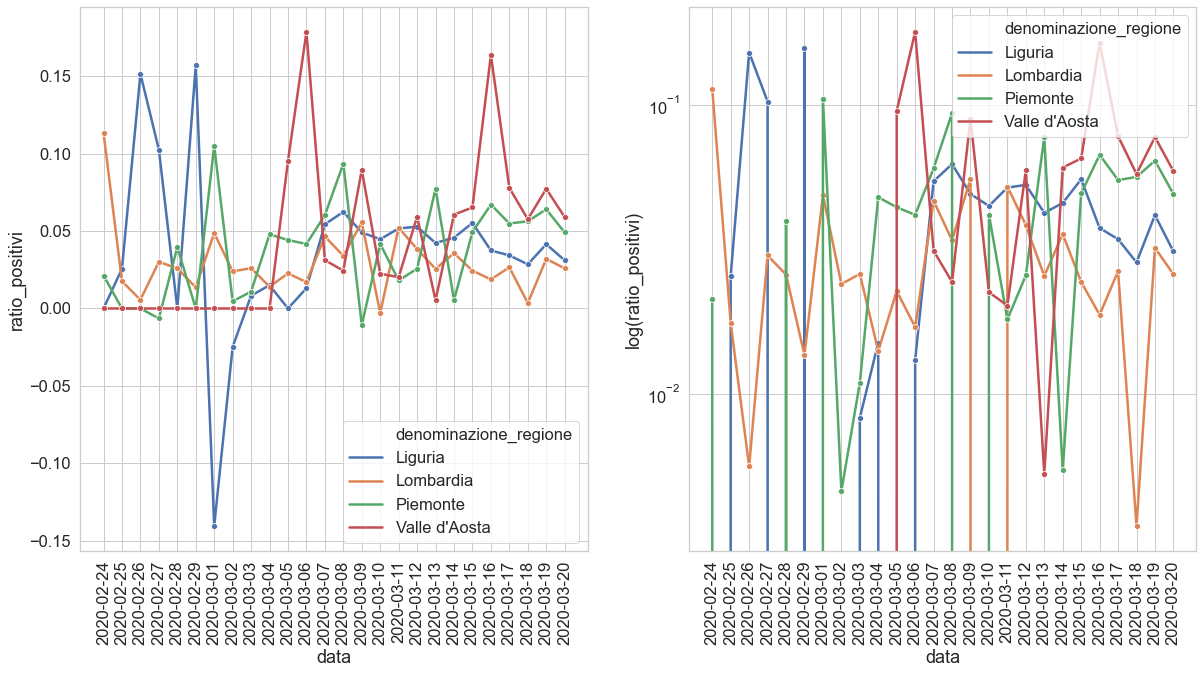

In [34]:
plot_region_indicators(NW_REGIONS)

### Growth Rates

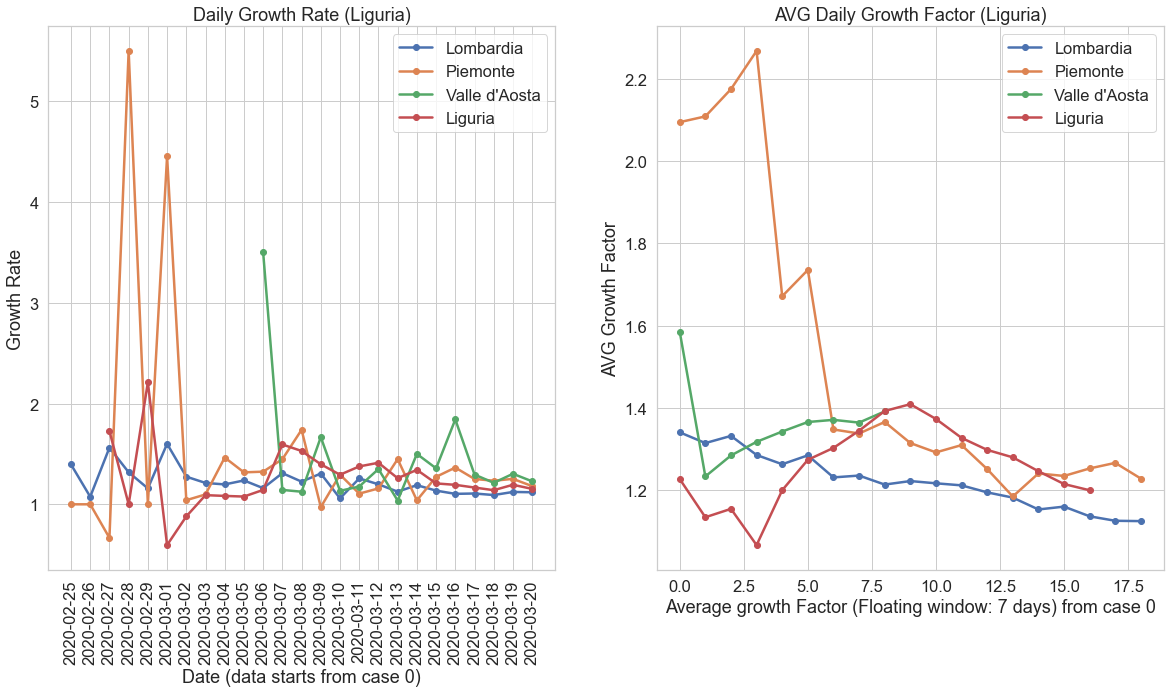

In [35]:
growth_rates(data=regions_data_json,
             areas=NW_REGIONS,
             area_target='denominazione_regione',
             indicator='totale_casi')

## North-East Regions

### Trend

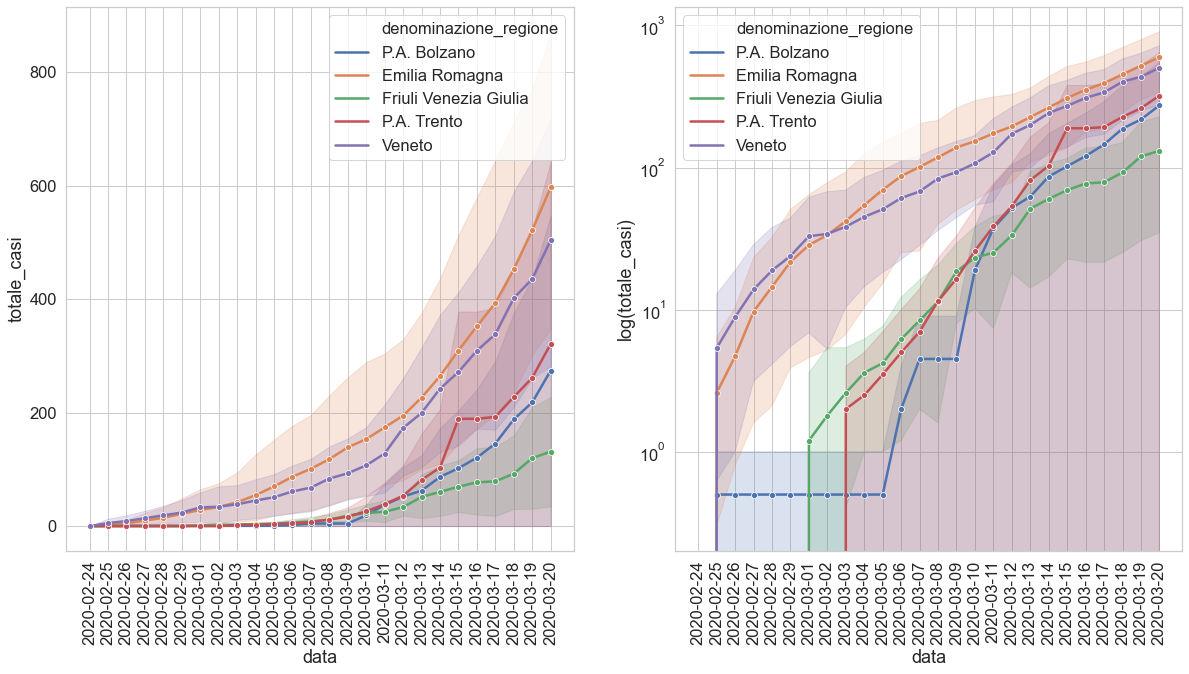

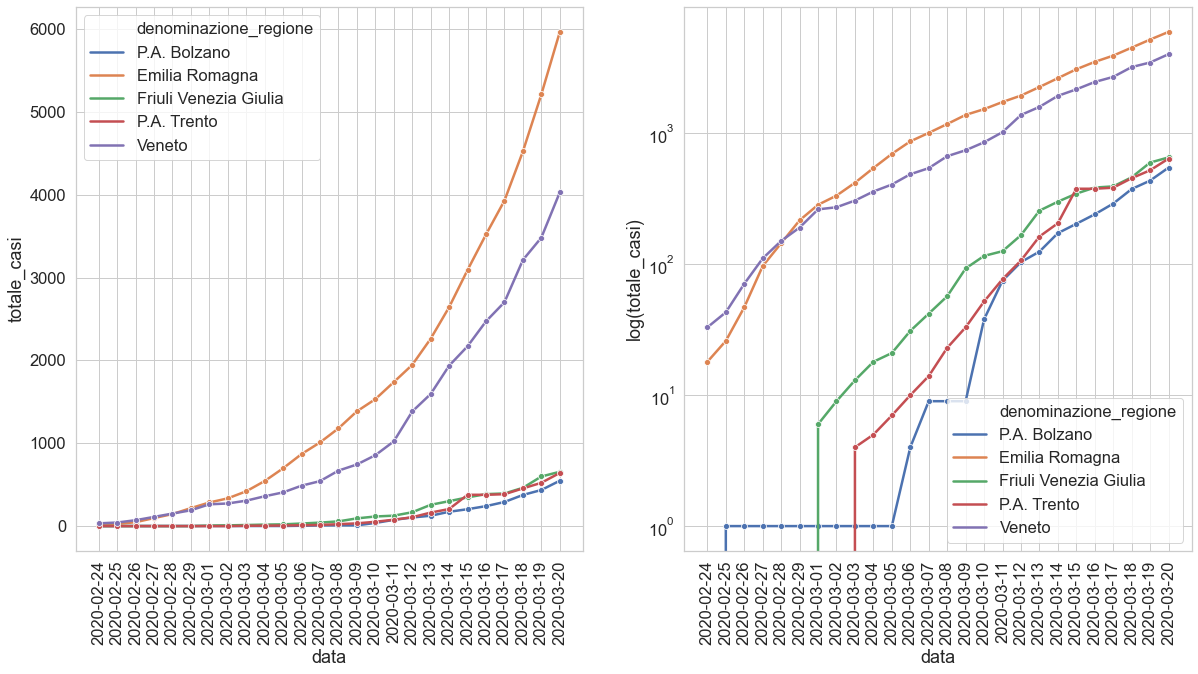

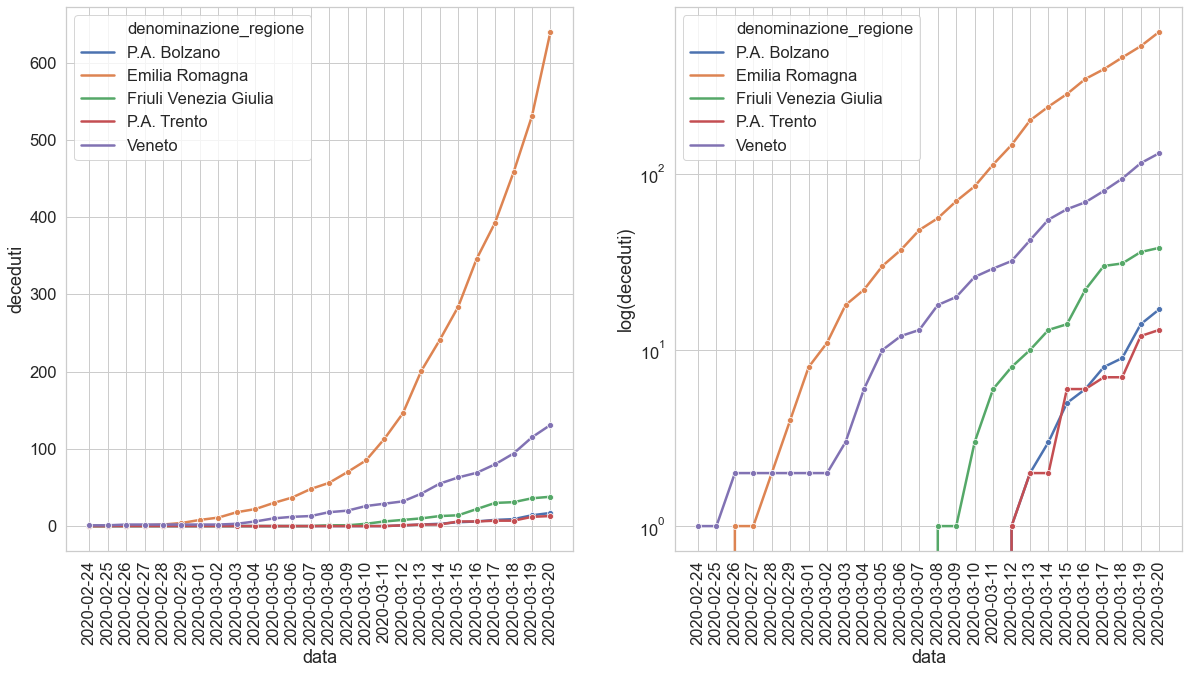

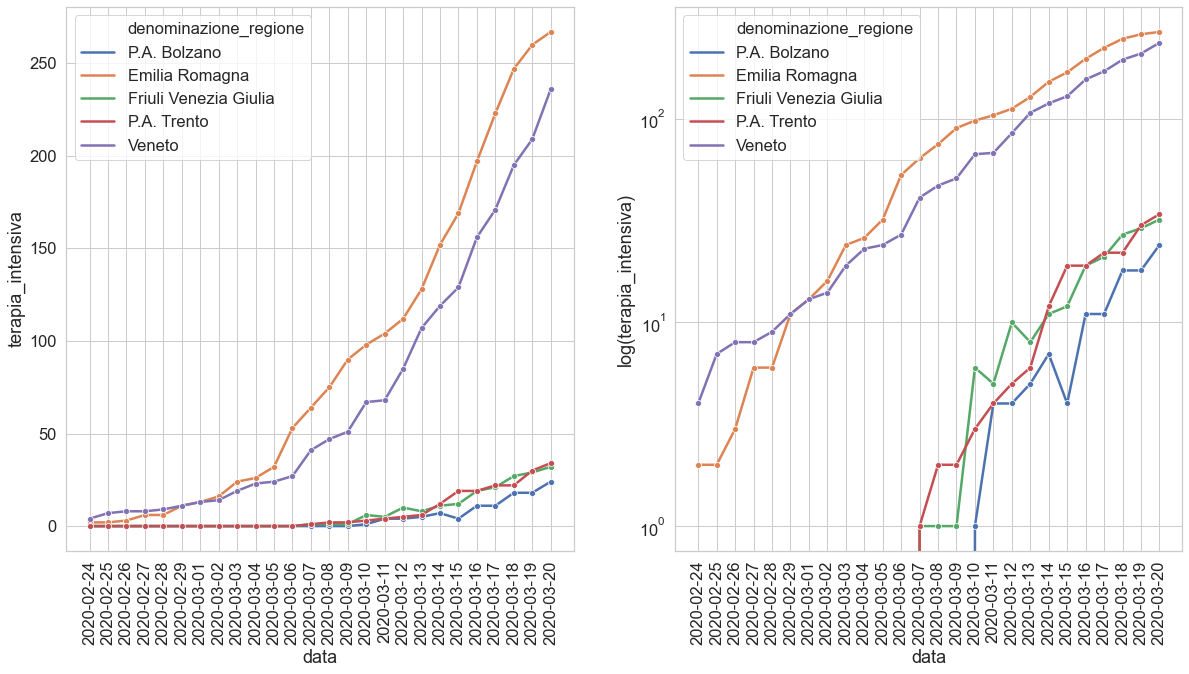

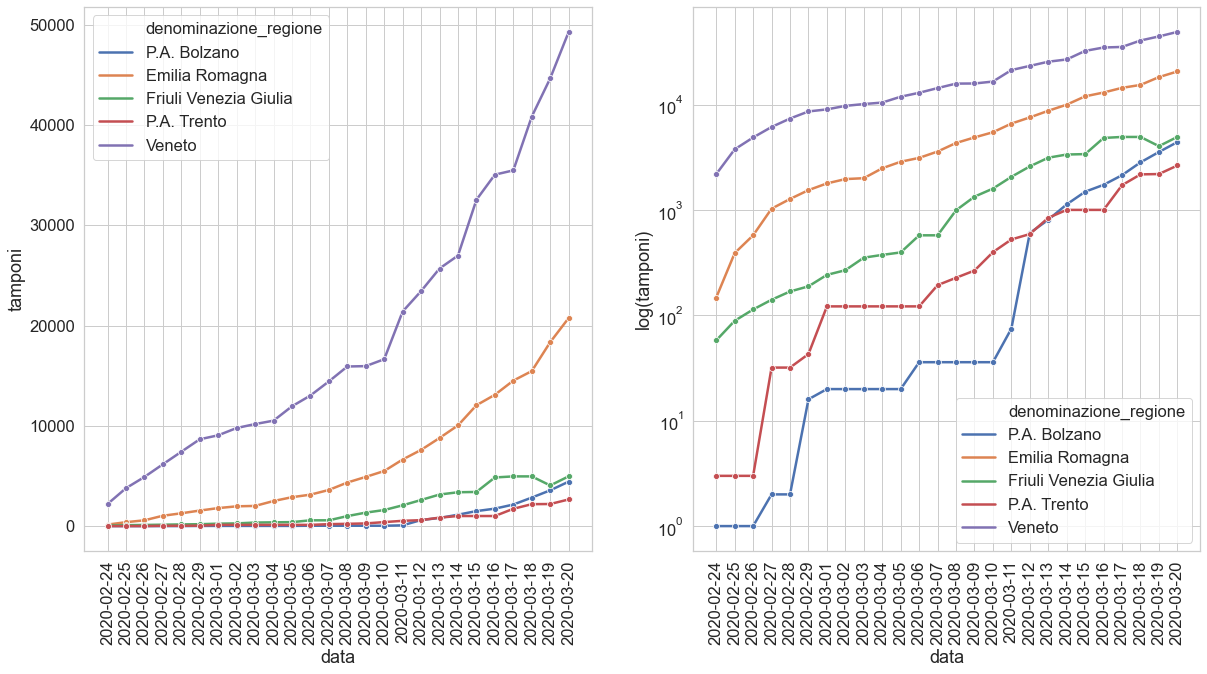

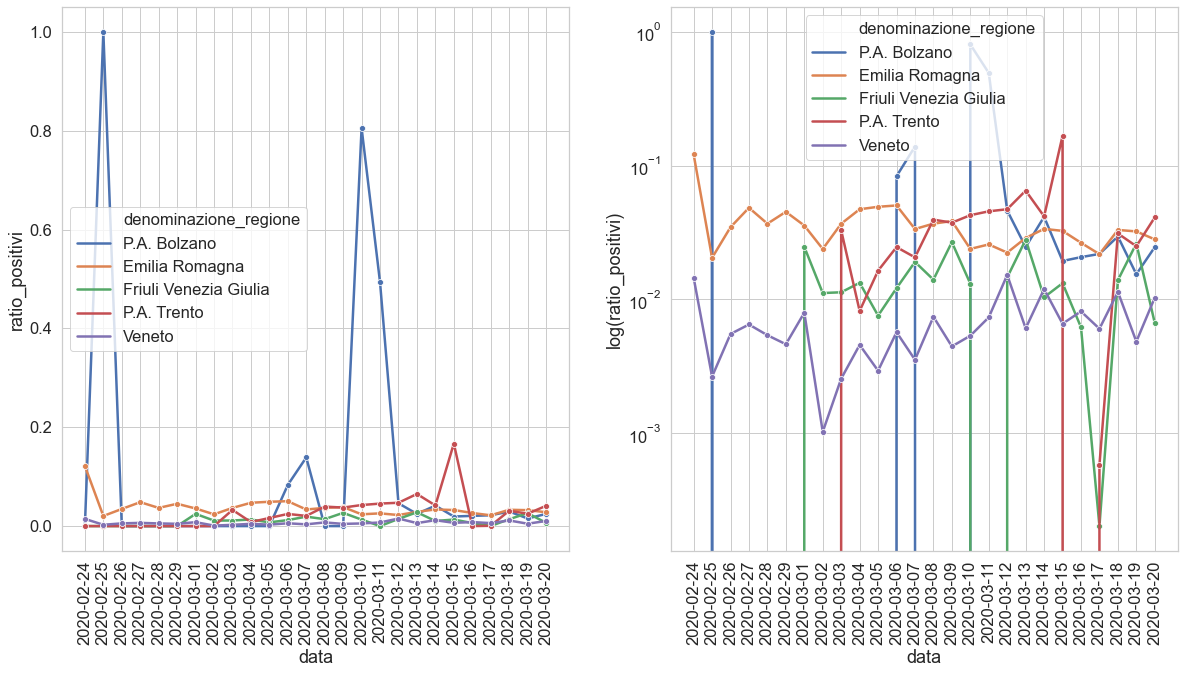

In [36]:
plot_region_indicators(NE_REGIONS)

### Growth Rates

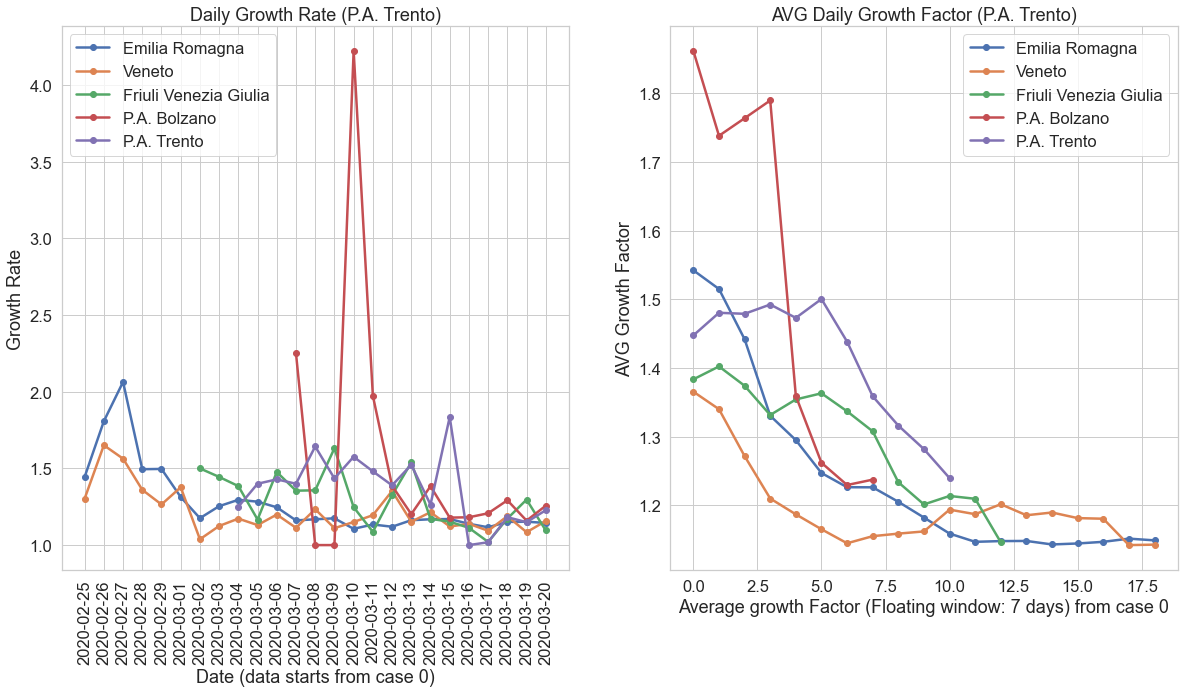

In [37]:
growth_rates(data=regions_data_json,
             areas=NE_REGIONS,
             area_target='denominazione_regione',
             indicator='totale_casi')

## Central Regions

### Trend

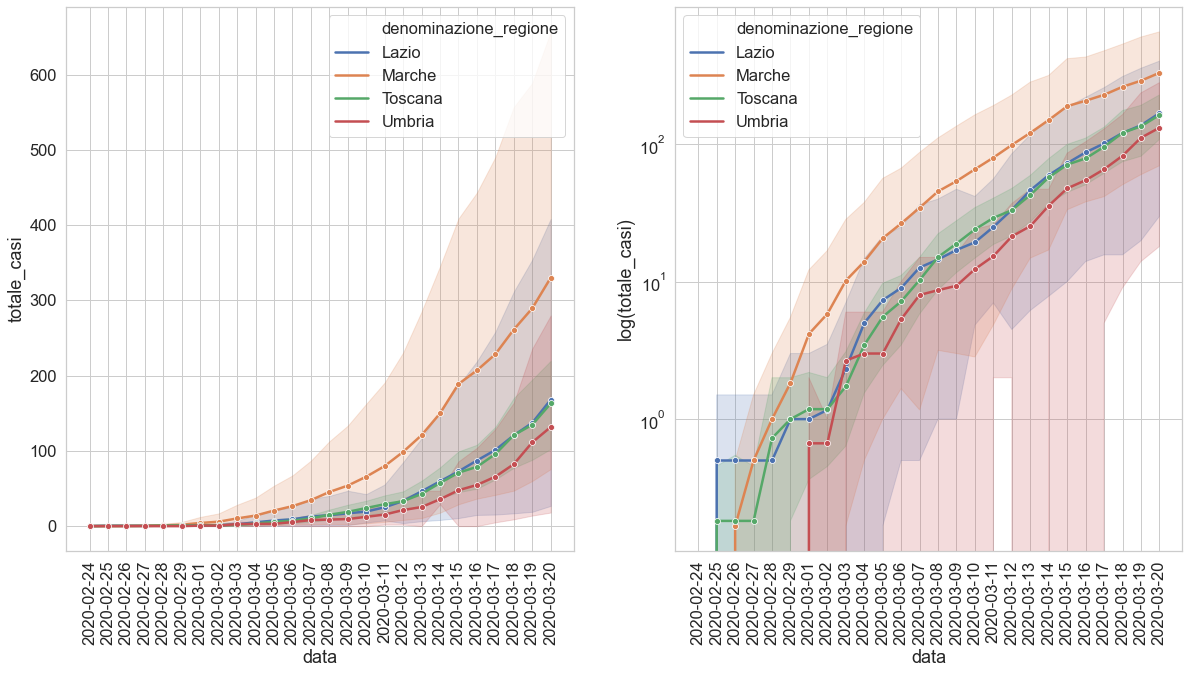

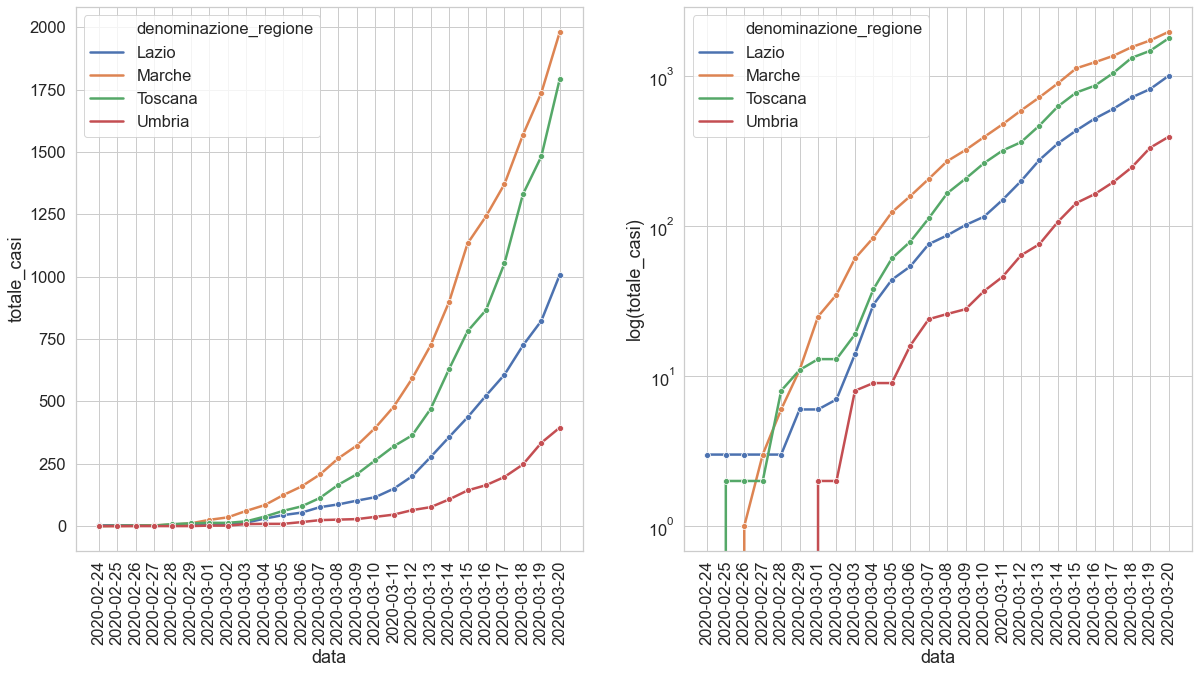

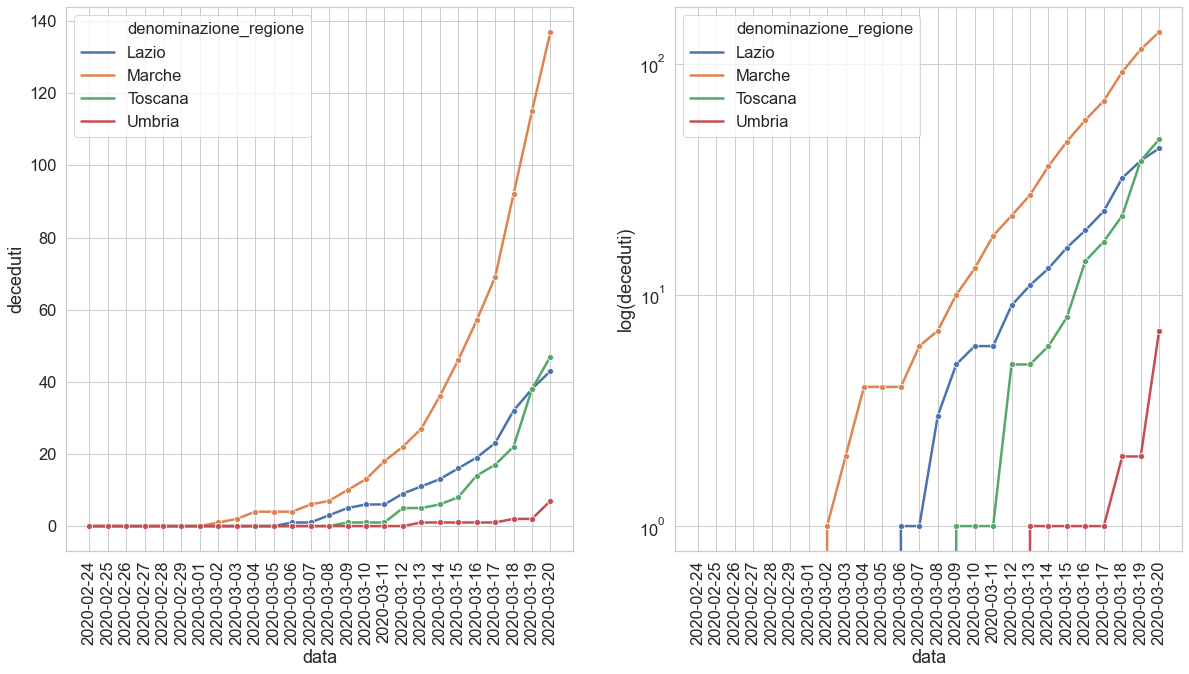

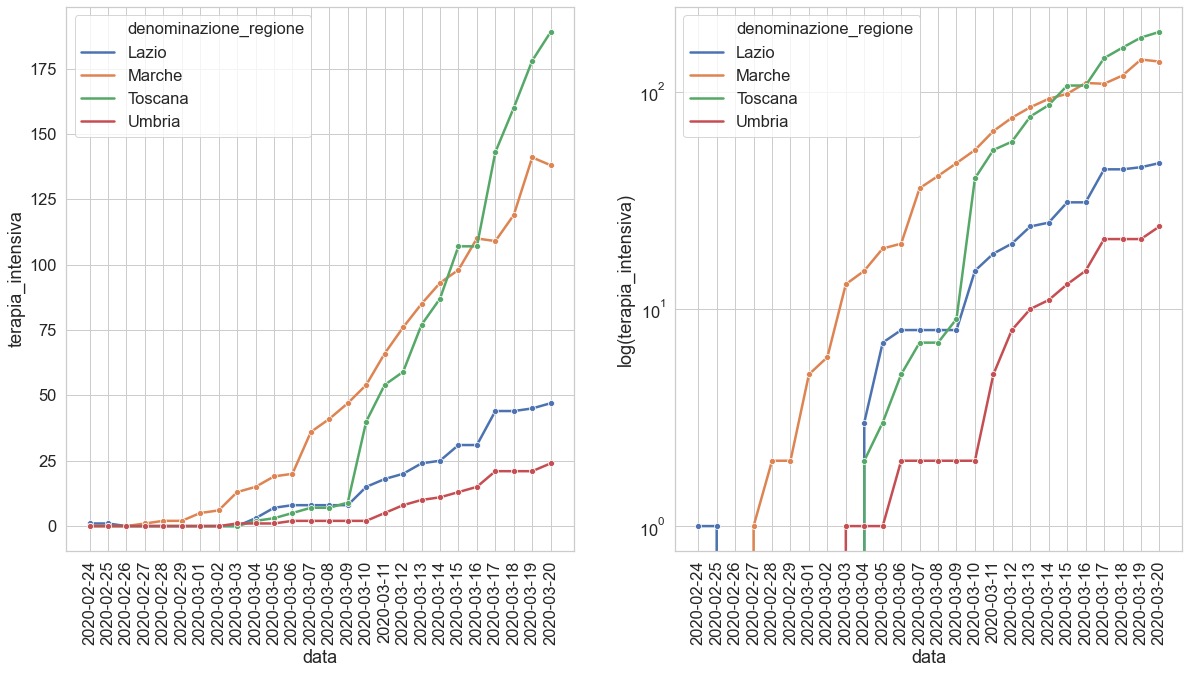

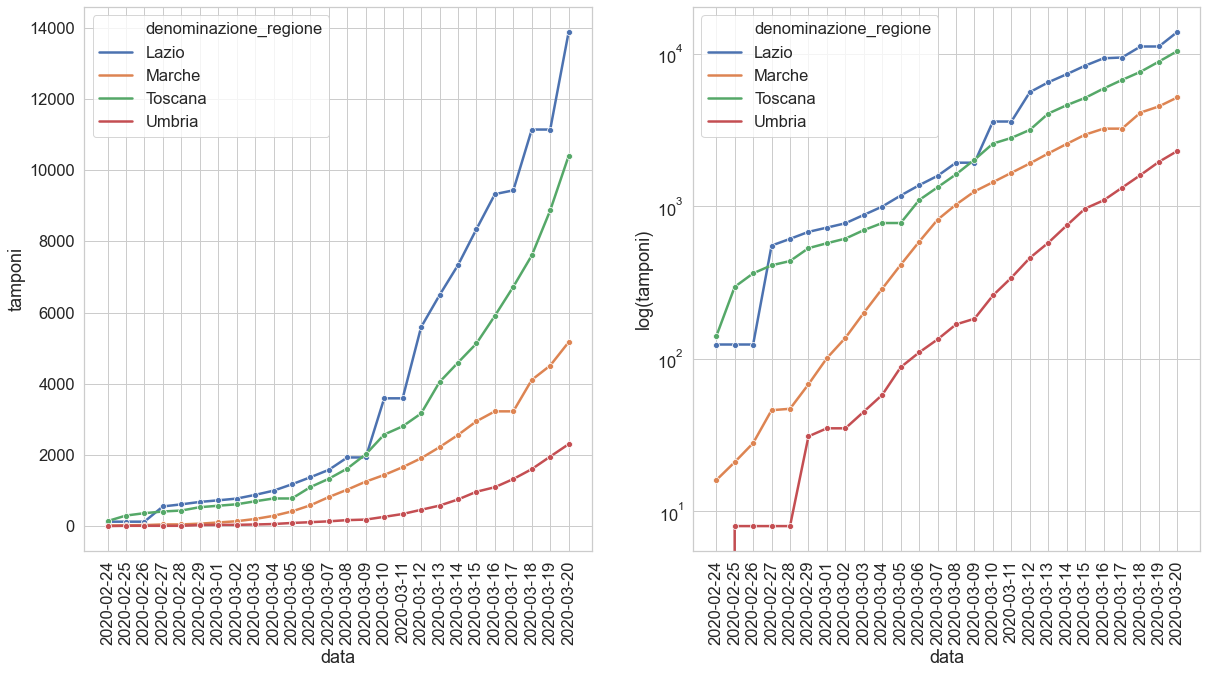

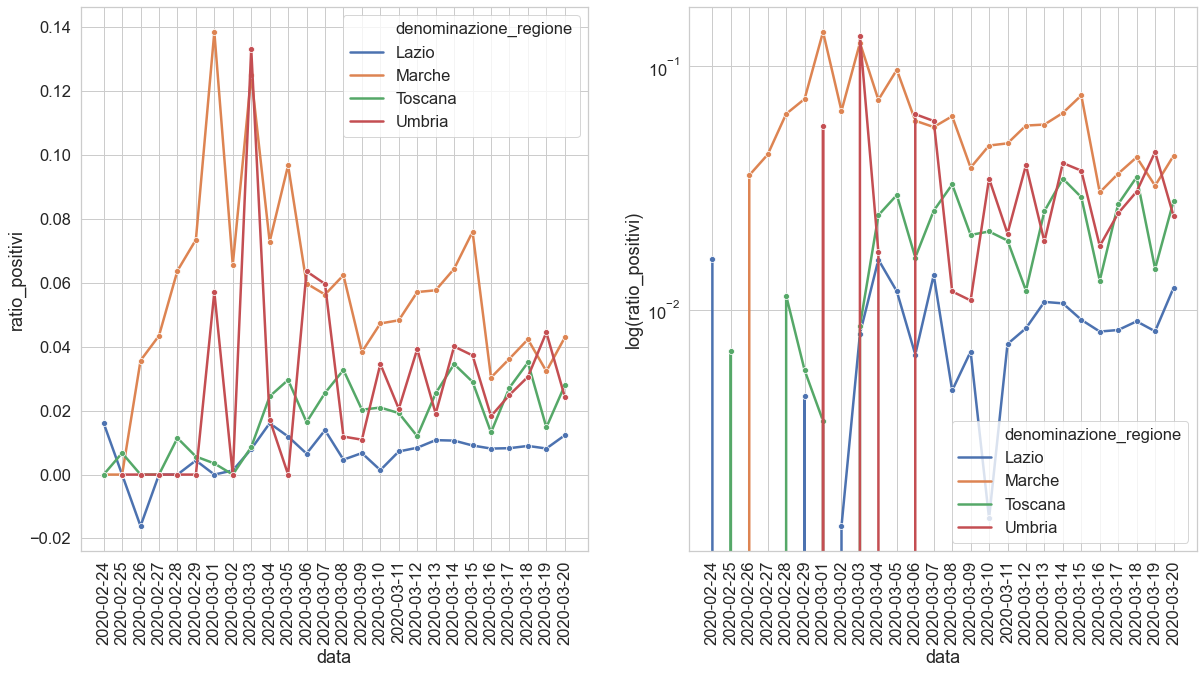

In [38]:
plot_region_indicators(C_REGIONS)

### Growth Rates

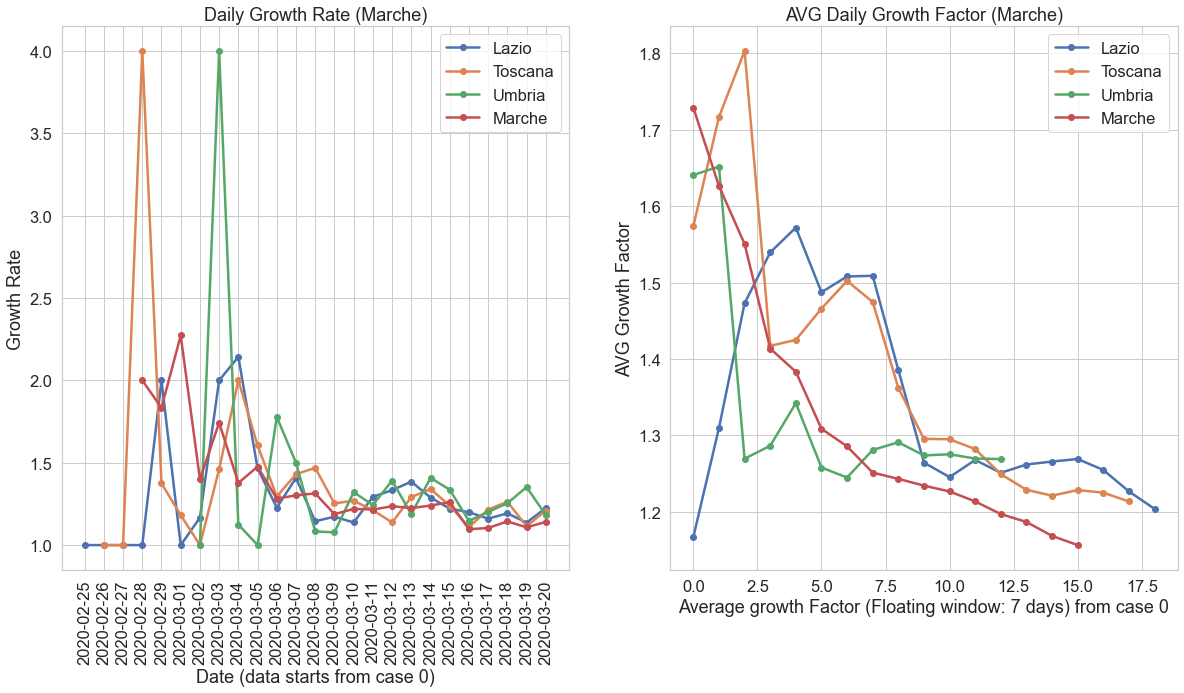

In [39]:
growth_rates(data=regions_data_json,
             areas=C_REGIONS,
             area_target='denominazione_regione',
             indicator='totale_casi')

## South Reagions

### Trend

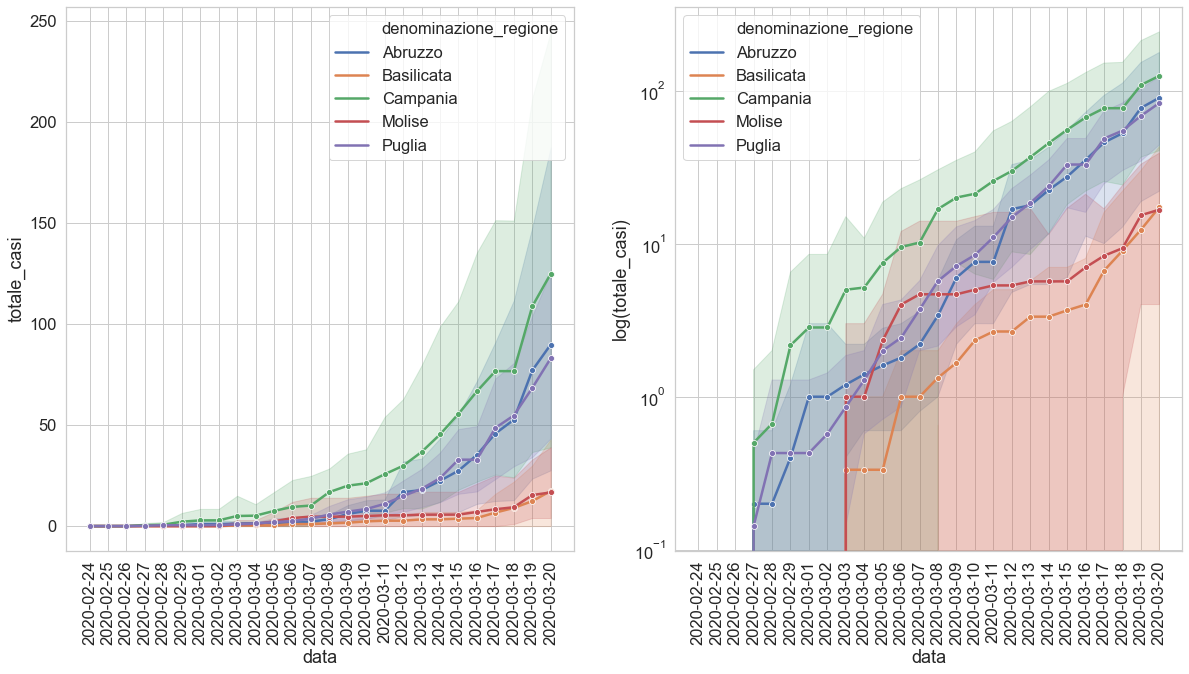

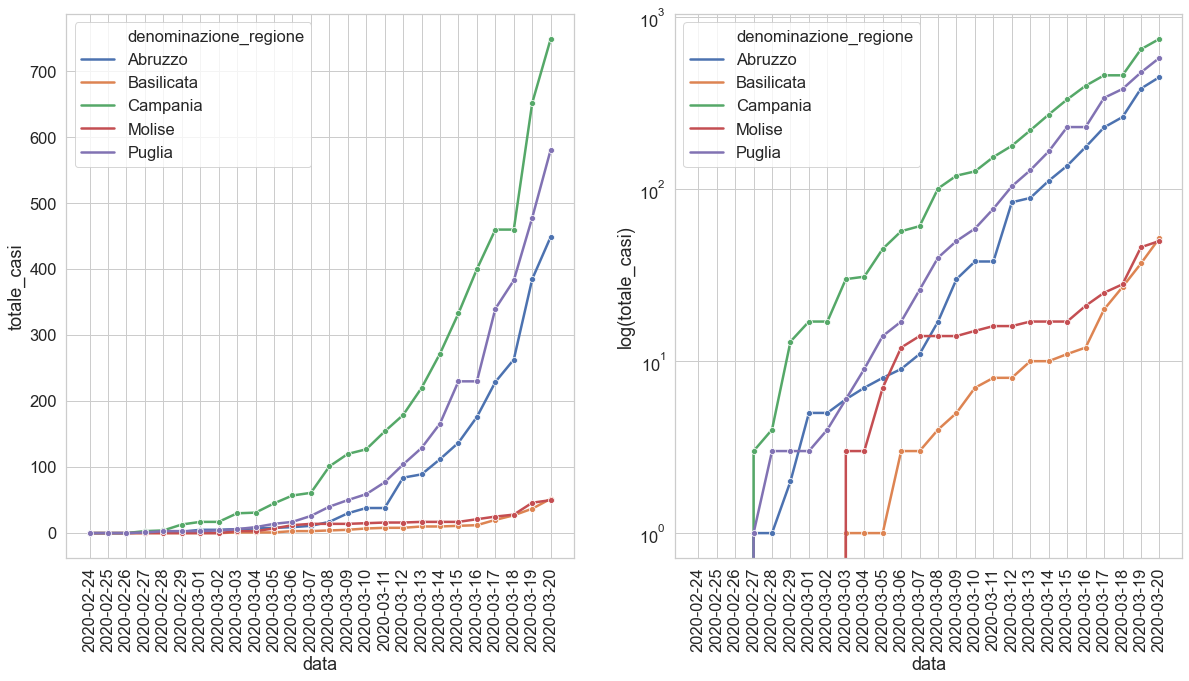

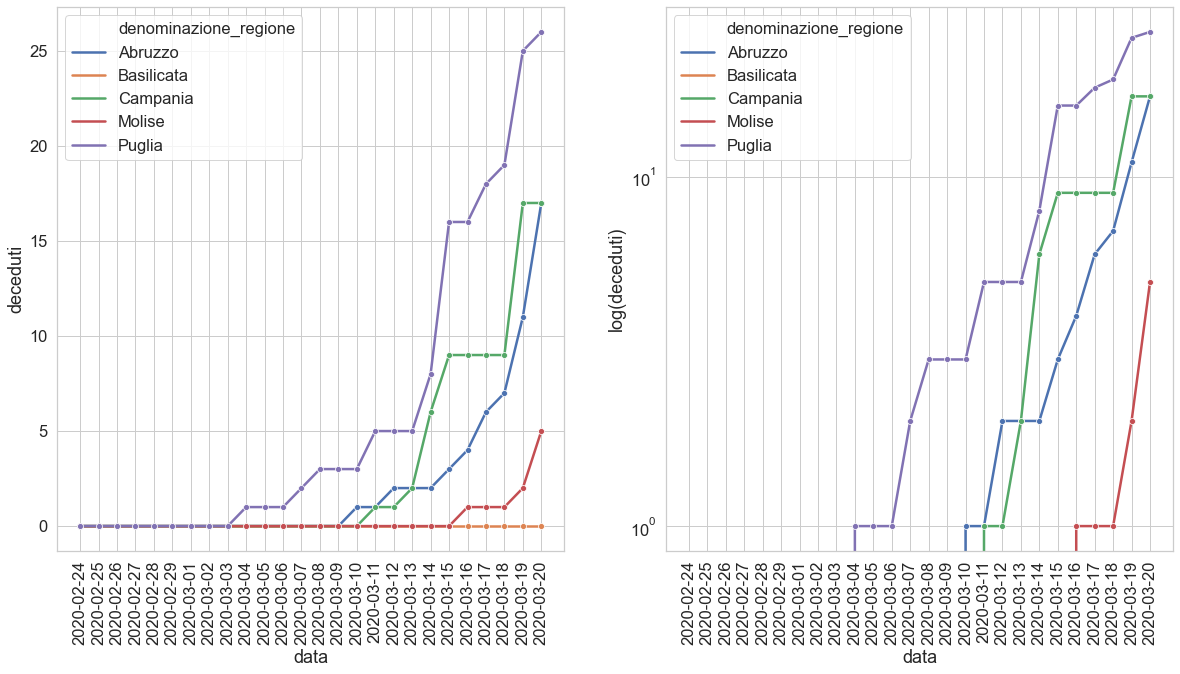

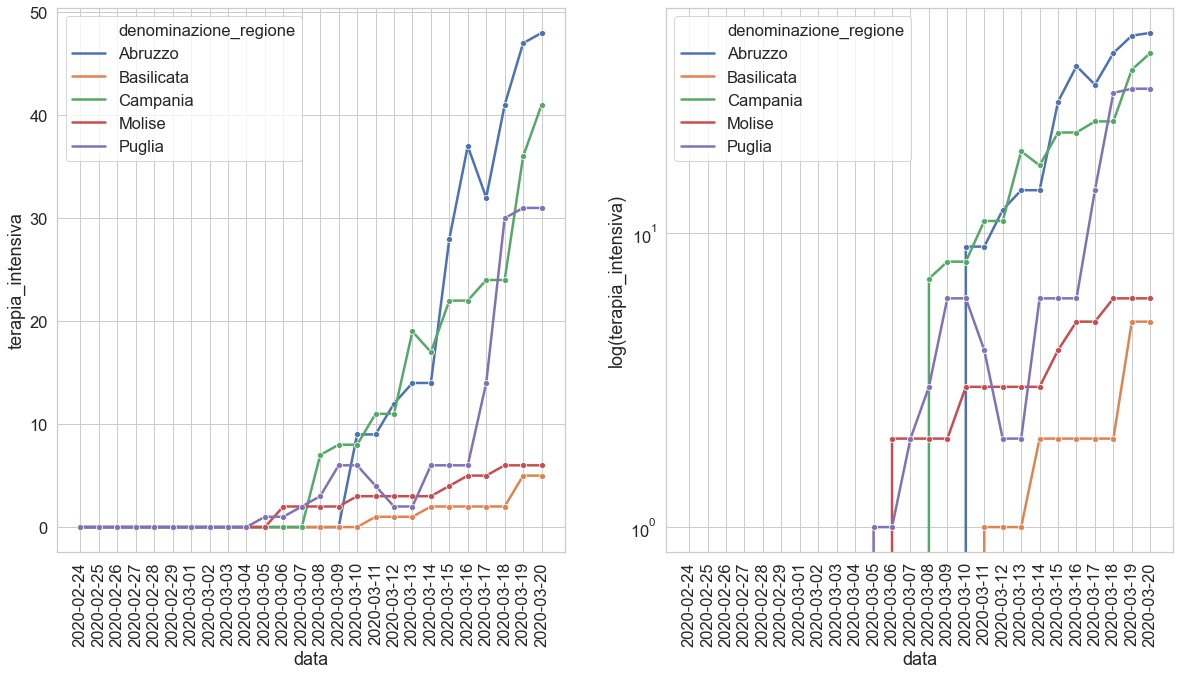

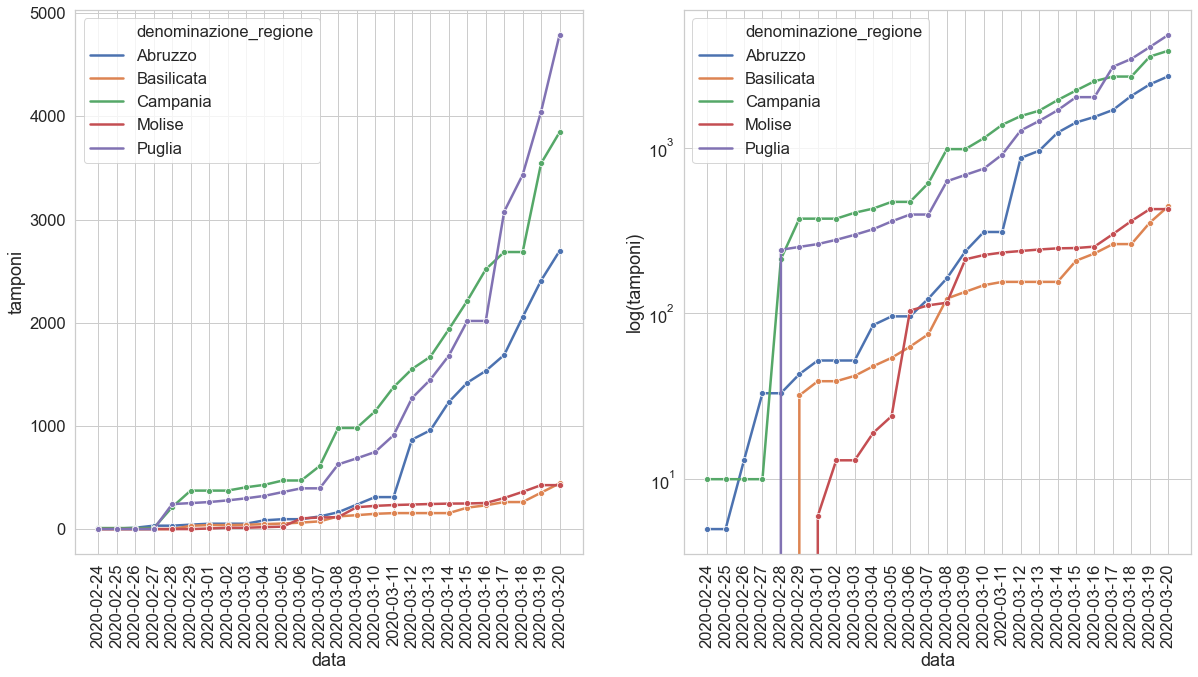

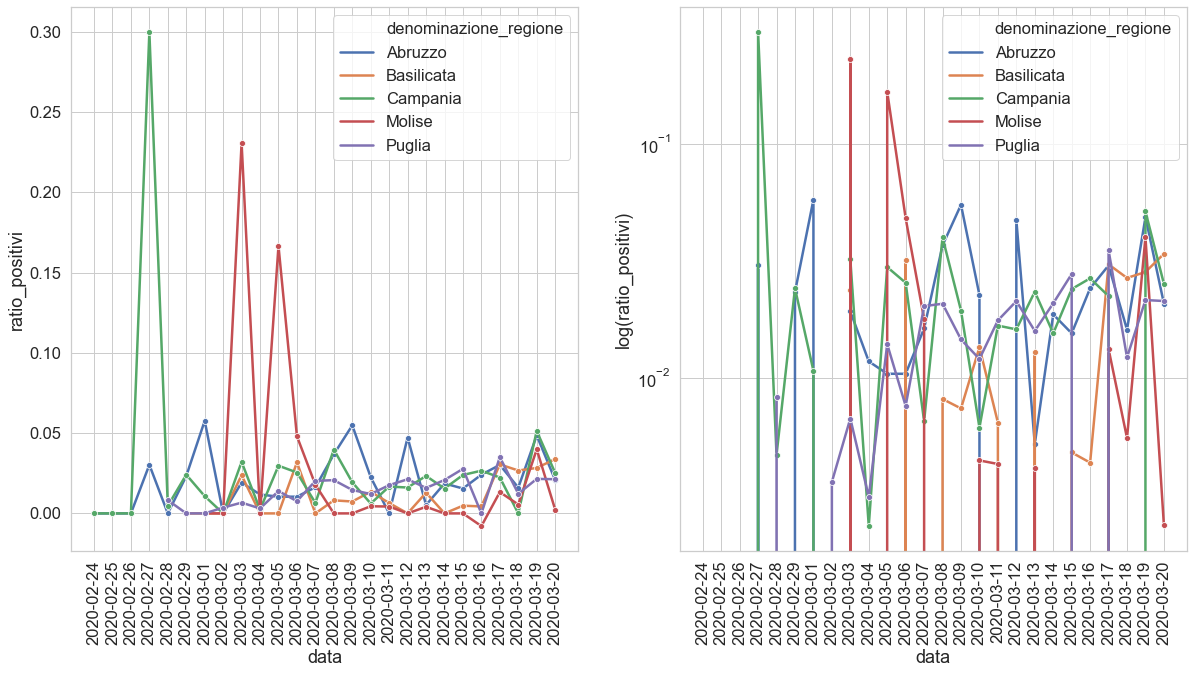

In [40]:
plot_region_indicators(S_REGIONS)

### Growth Rates

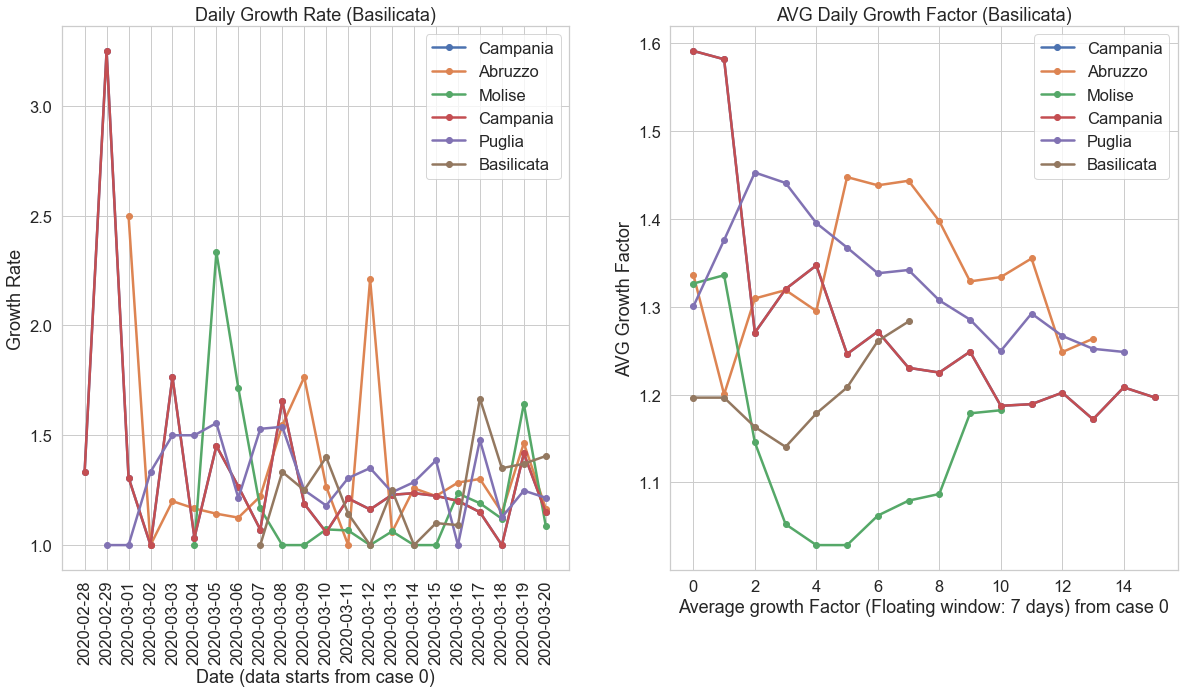

In [41]:
growth_rates(data=regions_data_json,
             areas=S_REGIONS,
             area_target='denominazione_regione',
             indicator='totale_casi')

## Islands

### Trend

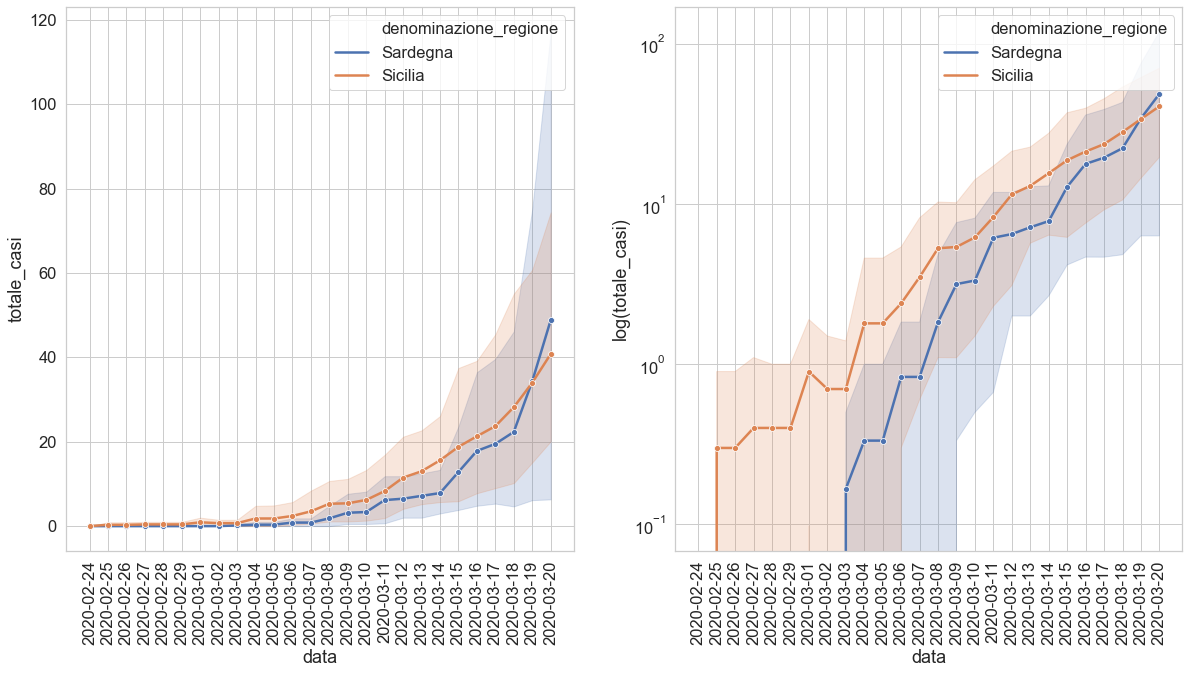

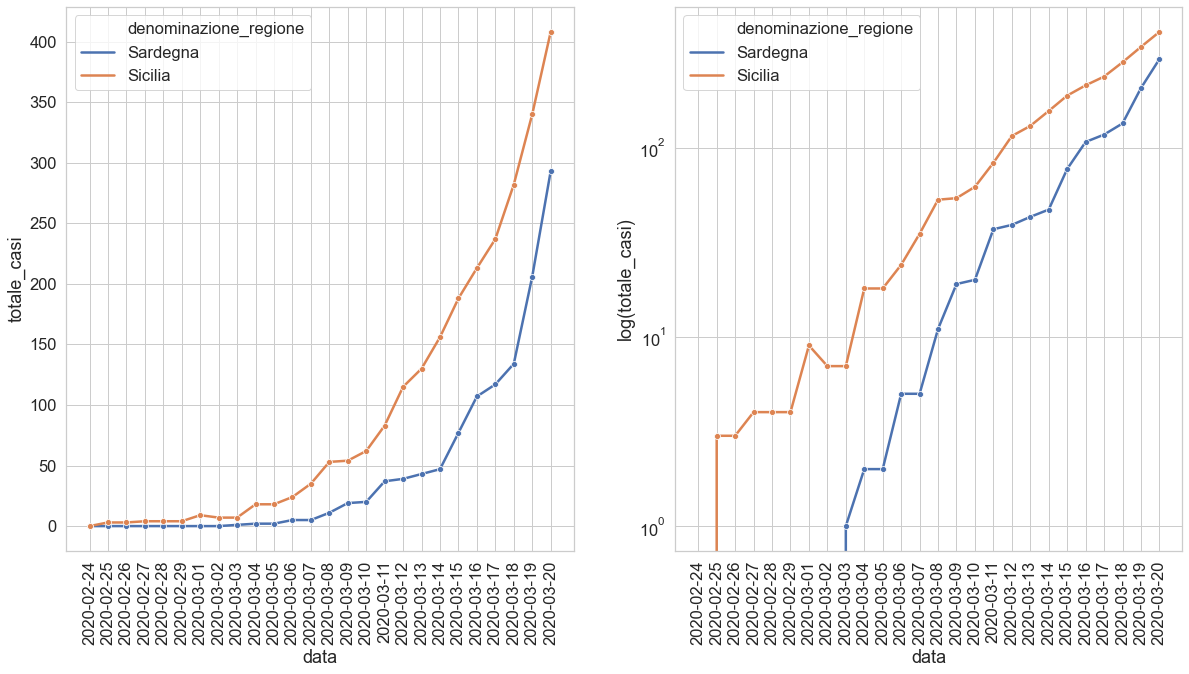

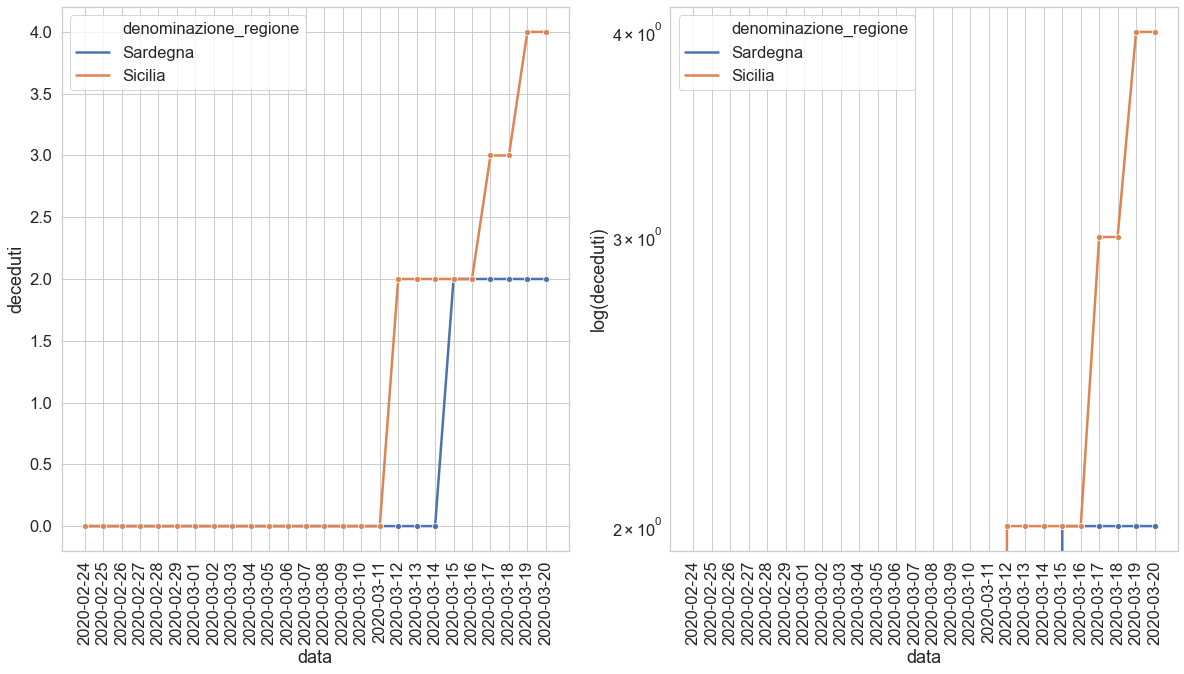

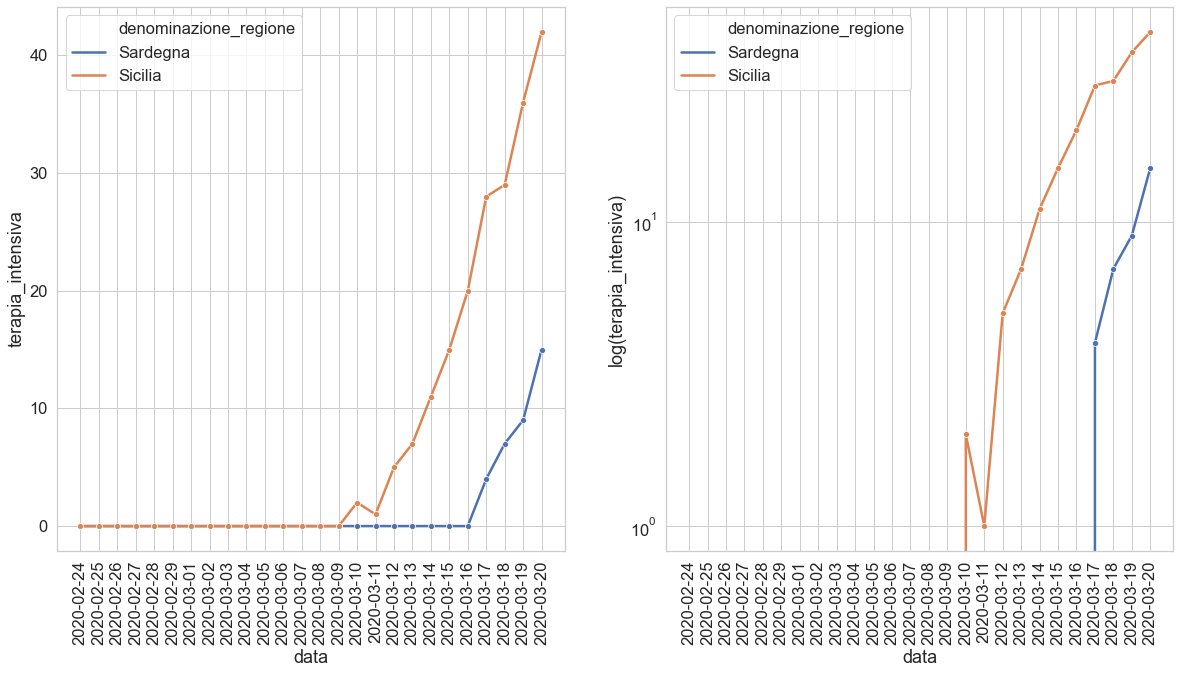

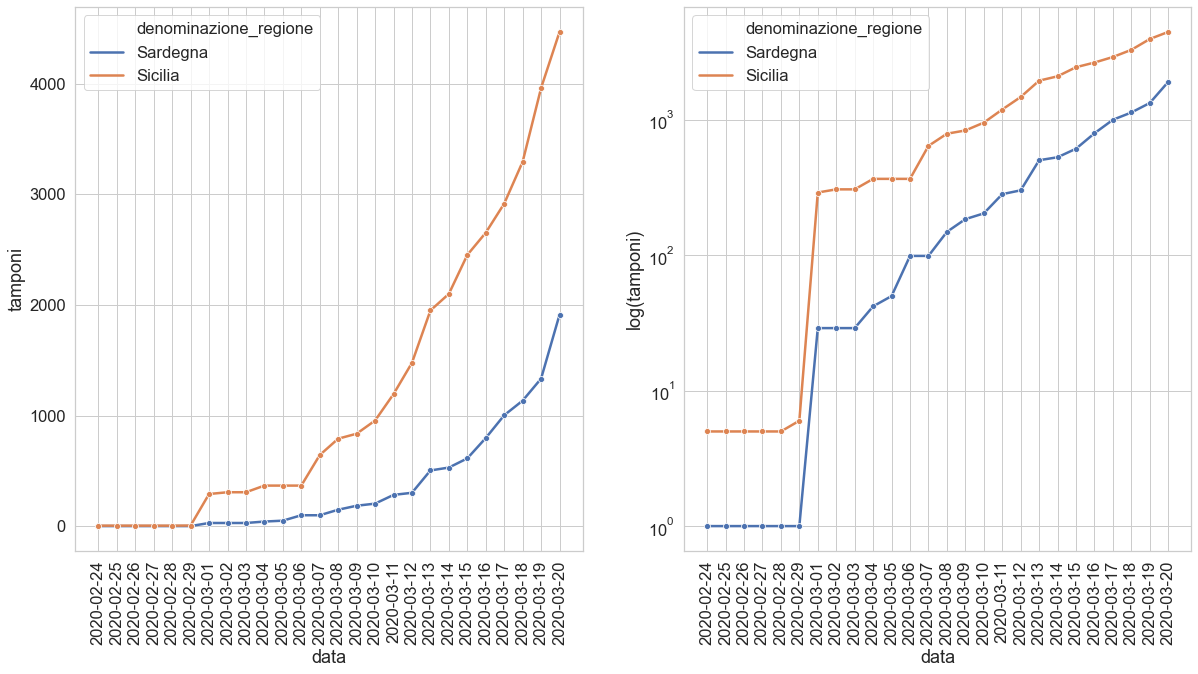

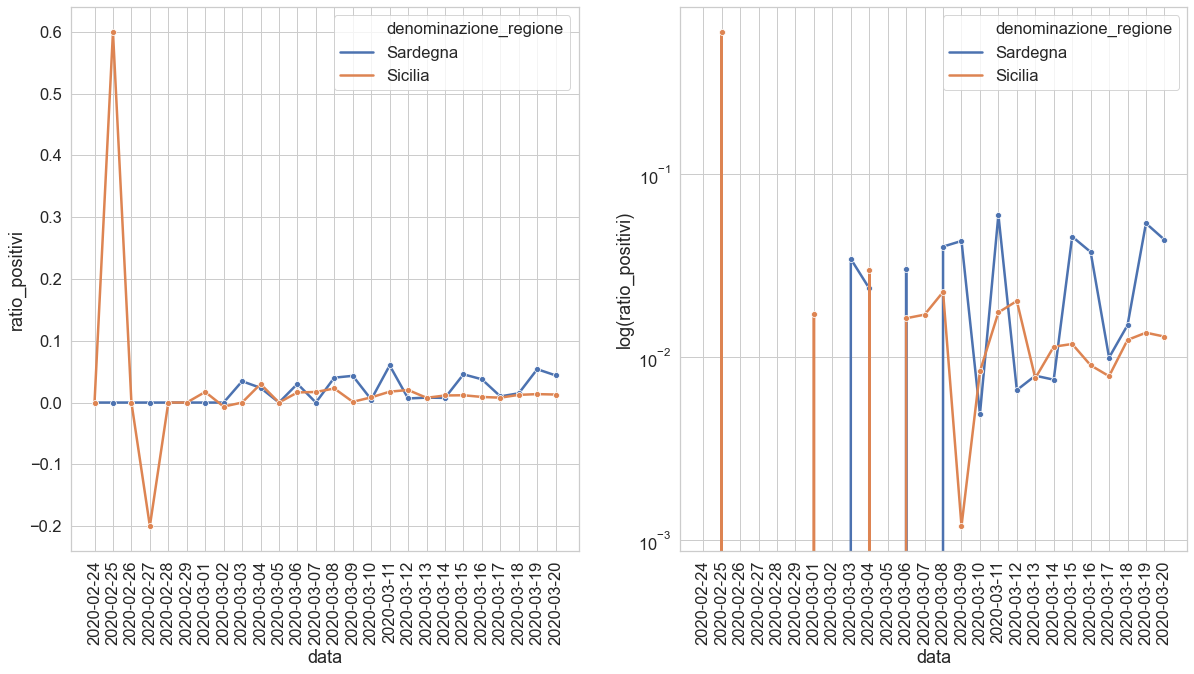

In [42]:
plot_region_indicators(ISLANDS)

### Growth Rates

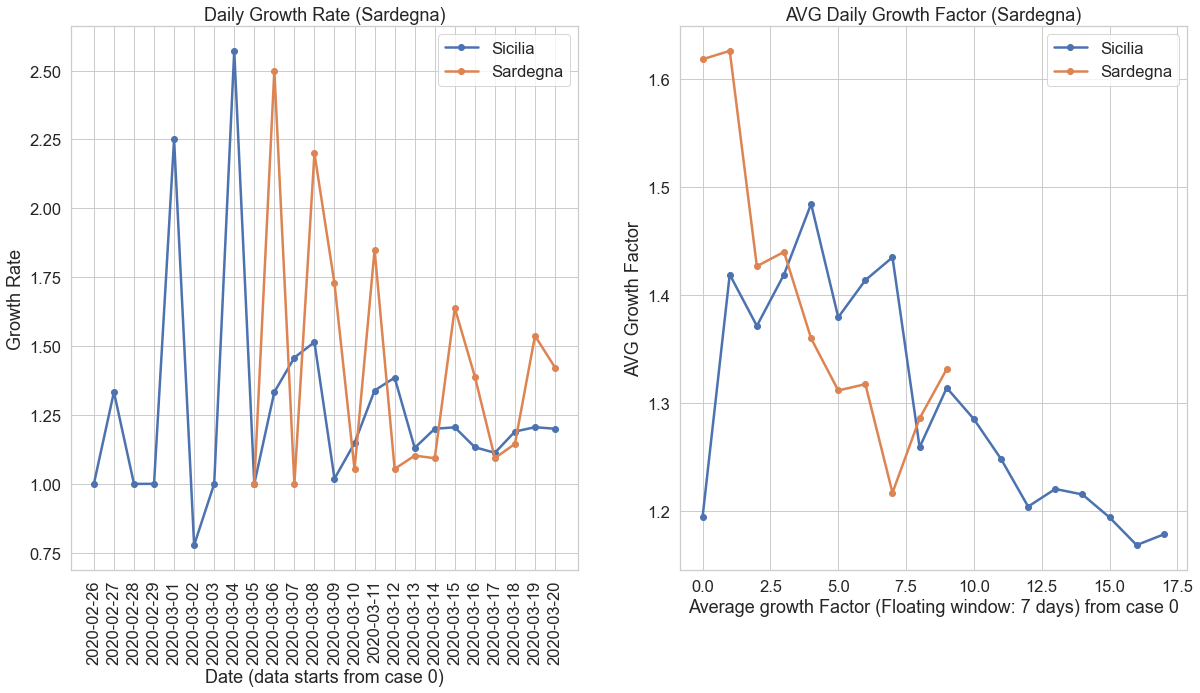

In [43]:
growth_rates(data=regions_data_json,
             areas=ISLANDS,
             area_target='denominazione_regione',
             indicator='totale_casi')

# Cities (Only Most Affected Regions)

## Lombardia

### Trend

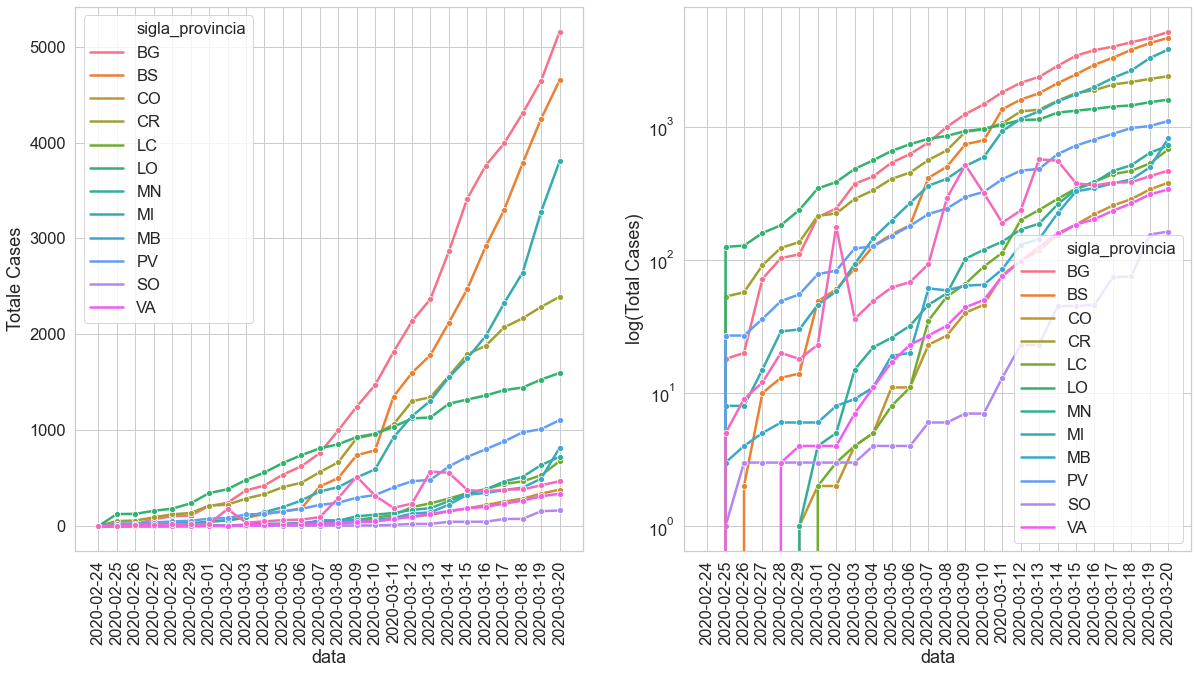

In [44]:
plot_region("Lombardia", data_json=cities_data_json)

### Growth Rates

In [46]:
growth_rates(data=cities_data_json,
             areas=['Bergamo','Milano'],
             area_target='sigla_provincia',
             indicator='totale_casi')

ValueError: not enough values to unpack (expected 2, got 0)

## Emilia Romagna

### Trend

In [ ]:
plot_region("Emilia Romagna", data_json=cities_data_json)

### Growth Rates

In [ ]:
growth_rates(data=cities_data_json,
             areas=CITIES_EMILIA,
             area_target='sigla_provincia',
             indicator='totale_casi')

## Veneto 

### Trend

In [ ]:
plot_region("Veneto", data_json=cities_data_json)

### Growth Rates

In [ ]:
growth_rates(data=cities_data_json,
             areas=CITIES_VENETO,
             area_target='sigla_provincia',
             indicator='totale_casi')

## Campania

### Trend

In [ ]:
plot_region("Campania", data_json=cities_data_json)

### Growth Rate

In [ ]:
growth_rates(data=data_json,
             areas=CITIES_CAMPANIA,
             area_target='sigla_provincia',
             indicator='totale_casi')